<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib.pyplot as plt



In [10]:
import matplotlib as mpl
mpl.style.use('classic')

## Model

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [13]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [14]:
x_train.shape[1:]

(32, 32, 3)

In [15]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [16]:
K.clear_session()
model = createModel()

In [17]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [19]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


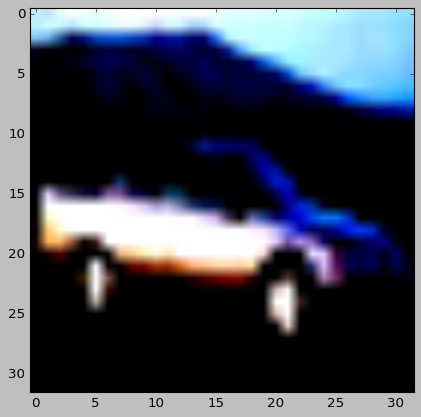

In [20]:
plt.imshow(x_train[4])

In [21]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 34s 165ms/step - loss: 1.7626 - accuracy: 0.3706 - val_loss: 2.8113 - val_accuracy: 0.1857
Epoch 2/10
196/196 [==============================] - 31s 159ms/step - loss: 1.3029 - accuracy: 0.5310 - val_loss: 1.3206 - val_accuracy: 0.5312
Epoch 3/10
196/196 [==============================] - 30s 156ms/step - loss: 1.1065 - accuracy: 0.6052 - val_loss: 1.0029 - val_accuracy: 0.6472
Epoch 4/10
196/196 [==============================] - 31s 158ms/step - loss: 0.9777 - accuracy: 0.6535 - val_loss: 0.8696 - val_accuracy: 0.6912
Epoch 5/10
196/196 [==============================] - 31s 159ms/step - loss: 0.8771 - accuracy: 0.6883 - val_loss: 0.7861 - val_accuracy: 0.7244
Epoch 6/10
196/196 [==============================] - 31s 158ms/step - loss: 0.8064 - accuracy: 0.7175 - val_loss: 0.7191 - val_accuracy: 0.7466
Epoch 7/10
196/196 [==============================] - 32s 162ms/step - loss: 0.7502 - accuracy: 0.7383 - val_loss: 0.6826 - val_ac

Text(0, 0.5, 'Loss')

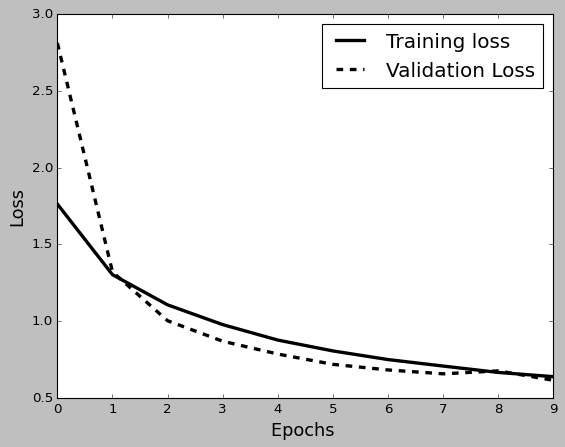

In [22]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

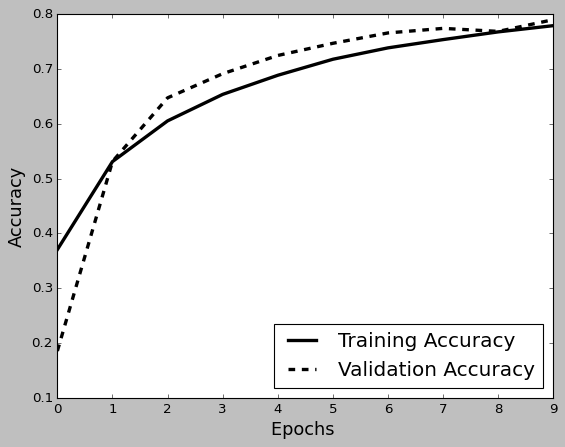

In [23]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
